In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
data= pd.read_csv('/content/drive/MyDrive/covid_19/covid_19_clean_complete.csv')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
from typing_extensions import TypeVarTuple
data.isna().sum()
data.dropna(inplace=True)
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,Western Pacific
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,Western Pacific
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,Western Pacific
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,Europe
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,Europe
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,Europe
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,Europe


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14664 entries, 8 to 49060
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  14664 non-null  object 
 2   Lat             14664 non-null  float64
 3   Long            14664 non-null  float64
 4   Date            14664 non-null  object 
 5   Confirmed       14664 non-null  int64  
 6   Deaths          14664 non-null  int64  
 7   Recovered       14664 non-null  int64  
 8   Active          14664 non-null  int64  
 9   WHO Region      14664 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.7+ MB


In [ ]:
data=data.join(pd.get_dummies(data['WHO Region']).astype(int)).drop(['WHO Region'],axis=1)
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Americas,Europe,Western Pacific
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,0,0,1
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,0,0,1
10,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,0,0,1
11,Queensland,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,0,0,1
12,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49052,Anguilla,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,0,1,0
49053,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,0,1,0
49054,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,0,1,0
49059,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,0,1,0


In [ ]:
data=data.join(pd.get_dummies(data['Province/State']).astype(int)).drop(['Province/State'],axis=1)
data

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Americas,Europe,...,Tasmania,Tianjin,Tibet,Turks and Caicos Islands,Victoria,Western Australia,Xinjiang,Yukon,Yunnan,Zhejiang
8,Australia,-35.4735,149.0124,2020-01-22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Australia,-12.4634,130.8456,2020-01-22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Australia,-27.4698,153.0251,2020-01-22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Australia,-34.9285,138.6007,2020-01-22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49052,United Kingdom,18.2206,-63.0686,2020-07-27,3,0,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49053,United Kingdom,18.4207,-64.6400,2020-07-27,8,1,7,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49054,United Kingdom,21.6940,-71.7979,2020-07-27,99,2,36,61,0,1,...,0,0,0,1,0,0,0,0,0,0
49059,United Kingdom,-51.7963,-59.5236,2020-07-27,13,0,13,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

data['Days_Since_First_Case'] = (data['Date'] - data['Date'].min()).dt.days


data = data.drop('Date', axis=1)

In [ ]:
data

,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Americas,Europe,Western Pacific,...,Tianjin,Tibet,Turks and Caicos Islands,Victoria,Western Australia,Xinjiang,Yukon,Yunnan,Zhejiang,Days_Since_First_Case
8,Australia,-35.4735,149.0124,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Australia,-33.8688,151.2093,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,Australia,-12.4634,130.8456,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,Australia,-27.4698,153.0251,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12,Australia,-34.9285,138.6007,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49052,United Kingdom,18.2206,-63.0686,3,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,187
49053,United Kingdom,18.4207,-64.6400,8,1,7,0,0,1,0,...,0,0,0,0,0,0,0,0,0,187
49054,United Kingdom,21.6940,-71.7979,99,2,36,61,0,1,0,...,0,0,1,0,0,0,0,0,0,187
49059,United Kingdom,-51.7963,-59.5236,13,0,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,187


In [ ]:
data = data.join(pd.get_dummies(data['Country/Region'], prefix='Country').astype(int)).drop('Country/Region', axis=1)


In [ ]:
data


,Lat,Long,Confirmed,Deaths,Recovered,Active,Americas,Europe,Western Pacific,Alberta,Anguilla,Anhui,Aruba,Australian Capital Territory,Beijing,Bermuda,British Columbia,British Virgin Islands,Cayman Islands,Channel Islands,Chongqing,Curacao,Falkland Islands (Malvinas),Faroe Islands,French Guiana,French Polynesia,Fujian,Gansu,Gibraltar,Greenland,Guadeloupe,Guangdong,Guangxi,Guizhou,Hainan,Hebei,Heilongjiang,Henan,Hong Kong,Hubei,Hunan,Inner Mongolia,Isle of Man,Jiangsu,Jiangxi,Jilin,Liaoning,Macau,Manitoba,Martinique,Mayotte,Montserrat,New Brunswick,New Caledonia,New South Wales,Newfoundland and Labrador,Ningxia,Northern Territory,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,Qinghai,Quebec,Queensland,Reunion,Saint Barthelemy,Saint Pierre and Miquelon,Saskatchewan,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Sint Maarten,South Australia,St Martin,Tasmania,Tianjin,Tibet,Turks and Caicos Islands,Victoria,Western Australia,Xinjiang,Yukon,Yunnan,Zhejiang,Days_Since_First_Case,Country_Australia,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Greenland,Country_Netherlands,Country_United Kingdom
8,-35.4735,149.0124,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,-33.8688,151.2093,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,-12.4634,130.8456,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11,-27.4698,153.0251,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12,-34.9285,138.6007,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49052,18.2206,-63.0686,3,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,0,0,0,0,0,0,0,1
49053,18.4207,-64.6400,8,1,7,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,0,0,0,0,0,0,0,1
49054,21.6940,-71.7979,99,2,36,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,187,0,0,0,0,0,0,0,1
49059,-51.7963,-59.5236,13,0,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,0,0,0,0,0,0,0,1


In [ ]:
x=data.drop(['Confirmed'],axis=1)
y=data['Confirmed']


In [ ]:
#cross validation

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
data_transformed = np.log(train_data + 1)

plt.figure(figsize=(12, 8))
sns.heatmap(data_transformed, cmap='coolwarm', annot=True)
plt.title('Heatmap of Transformed Data')
plt.show()


In [ ]:
scaler = StandardScaler()
x_scaled_train= scaler.fit_transform(x_train)
x_scaled_test= scaler.transform(x_test)

In [ ]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_scaled_train)
x_poly_test = poly.transform(x_scaled_test)


linear = LinearRegression()
linear.fit(x_poly_train, y_train)

LinearRegression()

In [ ]:
x_poly_test.shape

(2933, 4656)

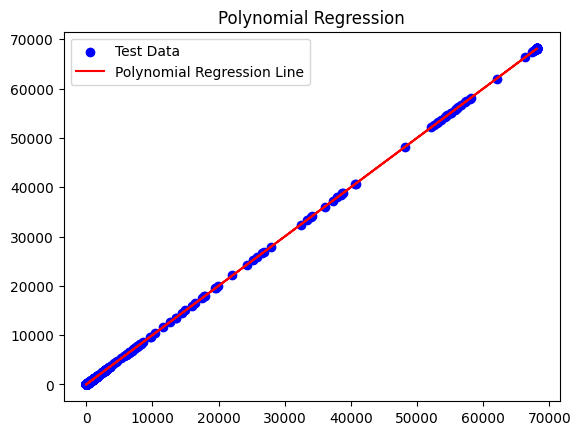

In [ ]:
X_grid = np.linspace(min(y_test), max(y_test), len(y_test)).reshape(-1, 1)
predictions = linear.predict(x_poly_test)

plt.scatter(y_test,predictions, color='blue', label='Test Data')
plt.plot(y_test, predictions, color='red', label='Polynomial Regression Line')

plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [ ]:
linear.score(x_poly_test,y_test)

0.9999999999954158